In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import os
import glob

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/BinaryDS/BinaryDataset_Shuffled.csv', index_col=0)

In [ ]:
dataset

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3371755,86.401886,515.053393,23182.513099,160.591634,474.190542,38018.559772,566.821013,436.280365,48726.669652,6344.228091,...,0.000000e+00,0.000000,1.000000,566.000000,0.000000,566.000000,0.000000e+00,0.000000e+00,0.000000,1
1639058,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.000000e+00,0.000000,1
416349,1.000418,428.864364,45.627248,1.012073,425.262124,1209.585007,1.360886,349.284587,18859.159960,3.713337,...,0.000000e+00,0.000000,13.978761,454.378103,19.926698,454.378103,3.970733e+02,0.000000e+00,0.000000,0
722657,126.206297,416.605717,48355.528380,195.345904,428.072426,45779.469713,567.149103,427.353051,46095.012719,5670.737868,...,0.000000e+00,0.000000,29719.298956,554.000000,0.000008,554.000000,5.820766e-11,0.000000e+00,0.000000,1
281502,1.000000,60.000000,0.000005,1.000030,60.000390,0.005066,1.031064,60.391669,4.938302,3.037198,...,-1.790000e-30,0.000000,6.461866,60.000000,0.000000,84.852814,1.820000e-12,-1.550000e-29,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471940,1.000031,98.000124,0.000496,1.003755,98.014963,0.059627,1.454471,99.249859,3.437289,5.457685,...,3.010000e-57,0.000000,5.260009,98.000000,0.000002,138.592929,3.640000e-12,1.340000e-29,0.000000,0
434471,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000000,110.000000,0.000000,1.000174,...,0.000000e+00,0.000000,1.736662,109.880570,1.540890,109.880570,2.374344e+00,0.000000e+00,0.000000,0
65912,1.595222,99.579655,1894.568143,1.735755,103.987301,1975.193732,2.216973,103.164500,1919.127898,10.413301,...,4.452127e+01,0.039262,19.755467,94.756220,41.691004,127.148261,1.861703e+03,8.491850e+01,0.078871,0


In [ ]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
DT_model = DecisionTreeClassifier( random_state = 42)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [ ]:
cf_matrix_DT = confusion_matrix(y_test, y_pred)

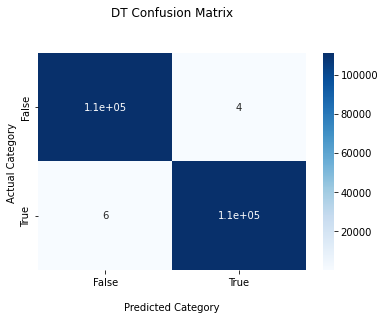

In [ ]:
# Decision tree plot
ax = sns.heatmap(cf_matrix_DT, annot=True, cmap='Blues')

ax.set_title('DT Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
DT_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_DT[0,0 ]
FP = cf_matrix_DT[0,1 ]
FN = cf_matrix_DT[1,0 ]
TP = cf_matrix_DT[1,1 ]
DT_Specificity = TN/(TN+FP)
print('Decision Tree Performance Evaluation Results:')
DT_Precision = precision_score(y_test, y_pred)
DT_F1 = f1_score (y_test, y_pred)
DT_Recall = recall_score(y_test, y_pred)
print('(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)')
round(DT_Accuracy,6), round(DT_Precision,6),  round(DT_Recall,6), round(DT_F1,6), round(DT_Specificity,6)

Decision Tree Performance Evaluation Results:
(DT_Accuracy, DT_Precision,  DT_Recall, DT_F1, DT_Specificity)


(0.999955, 0.999964, 0.999946, 0.999955, 0.999964)

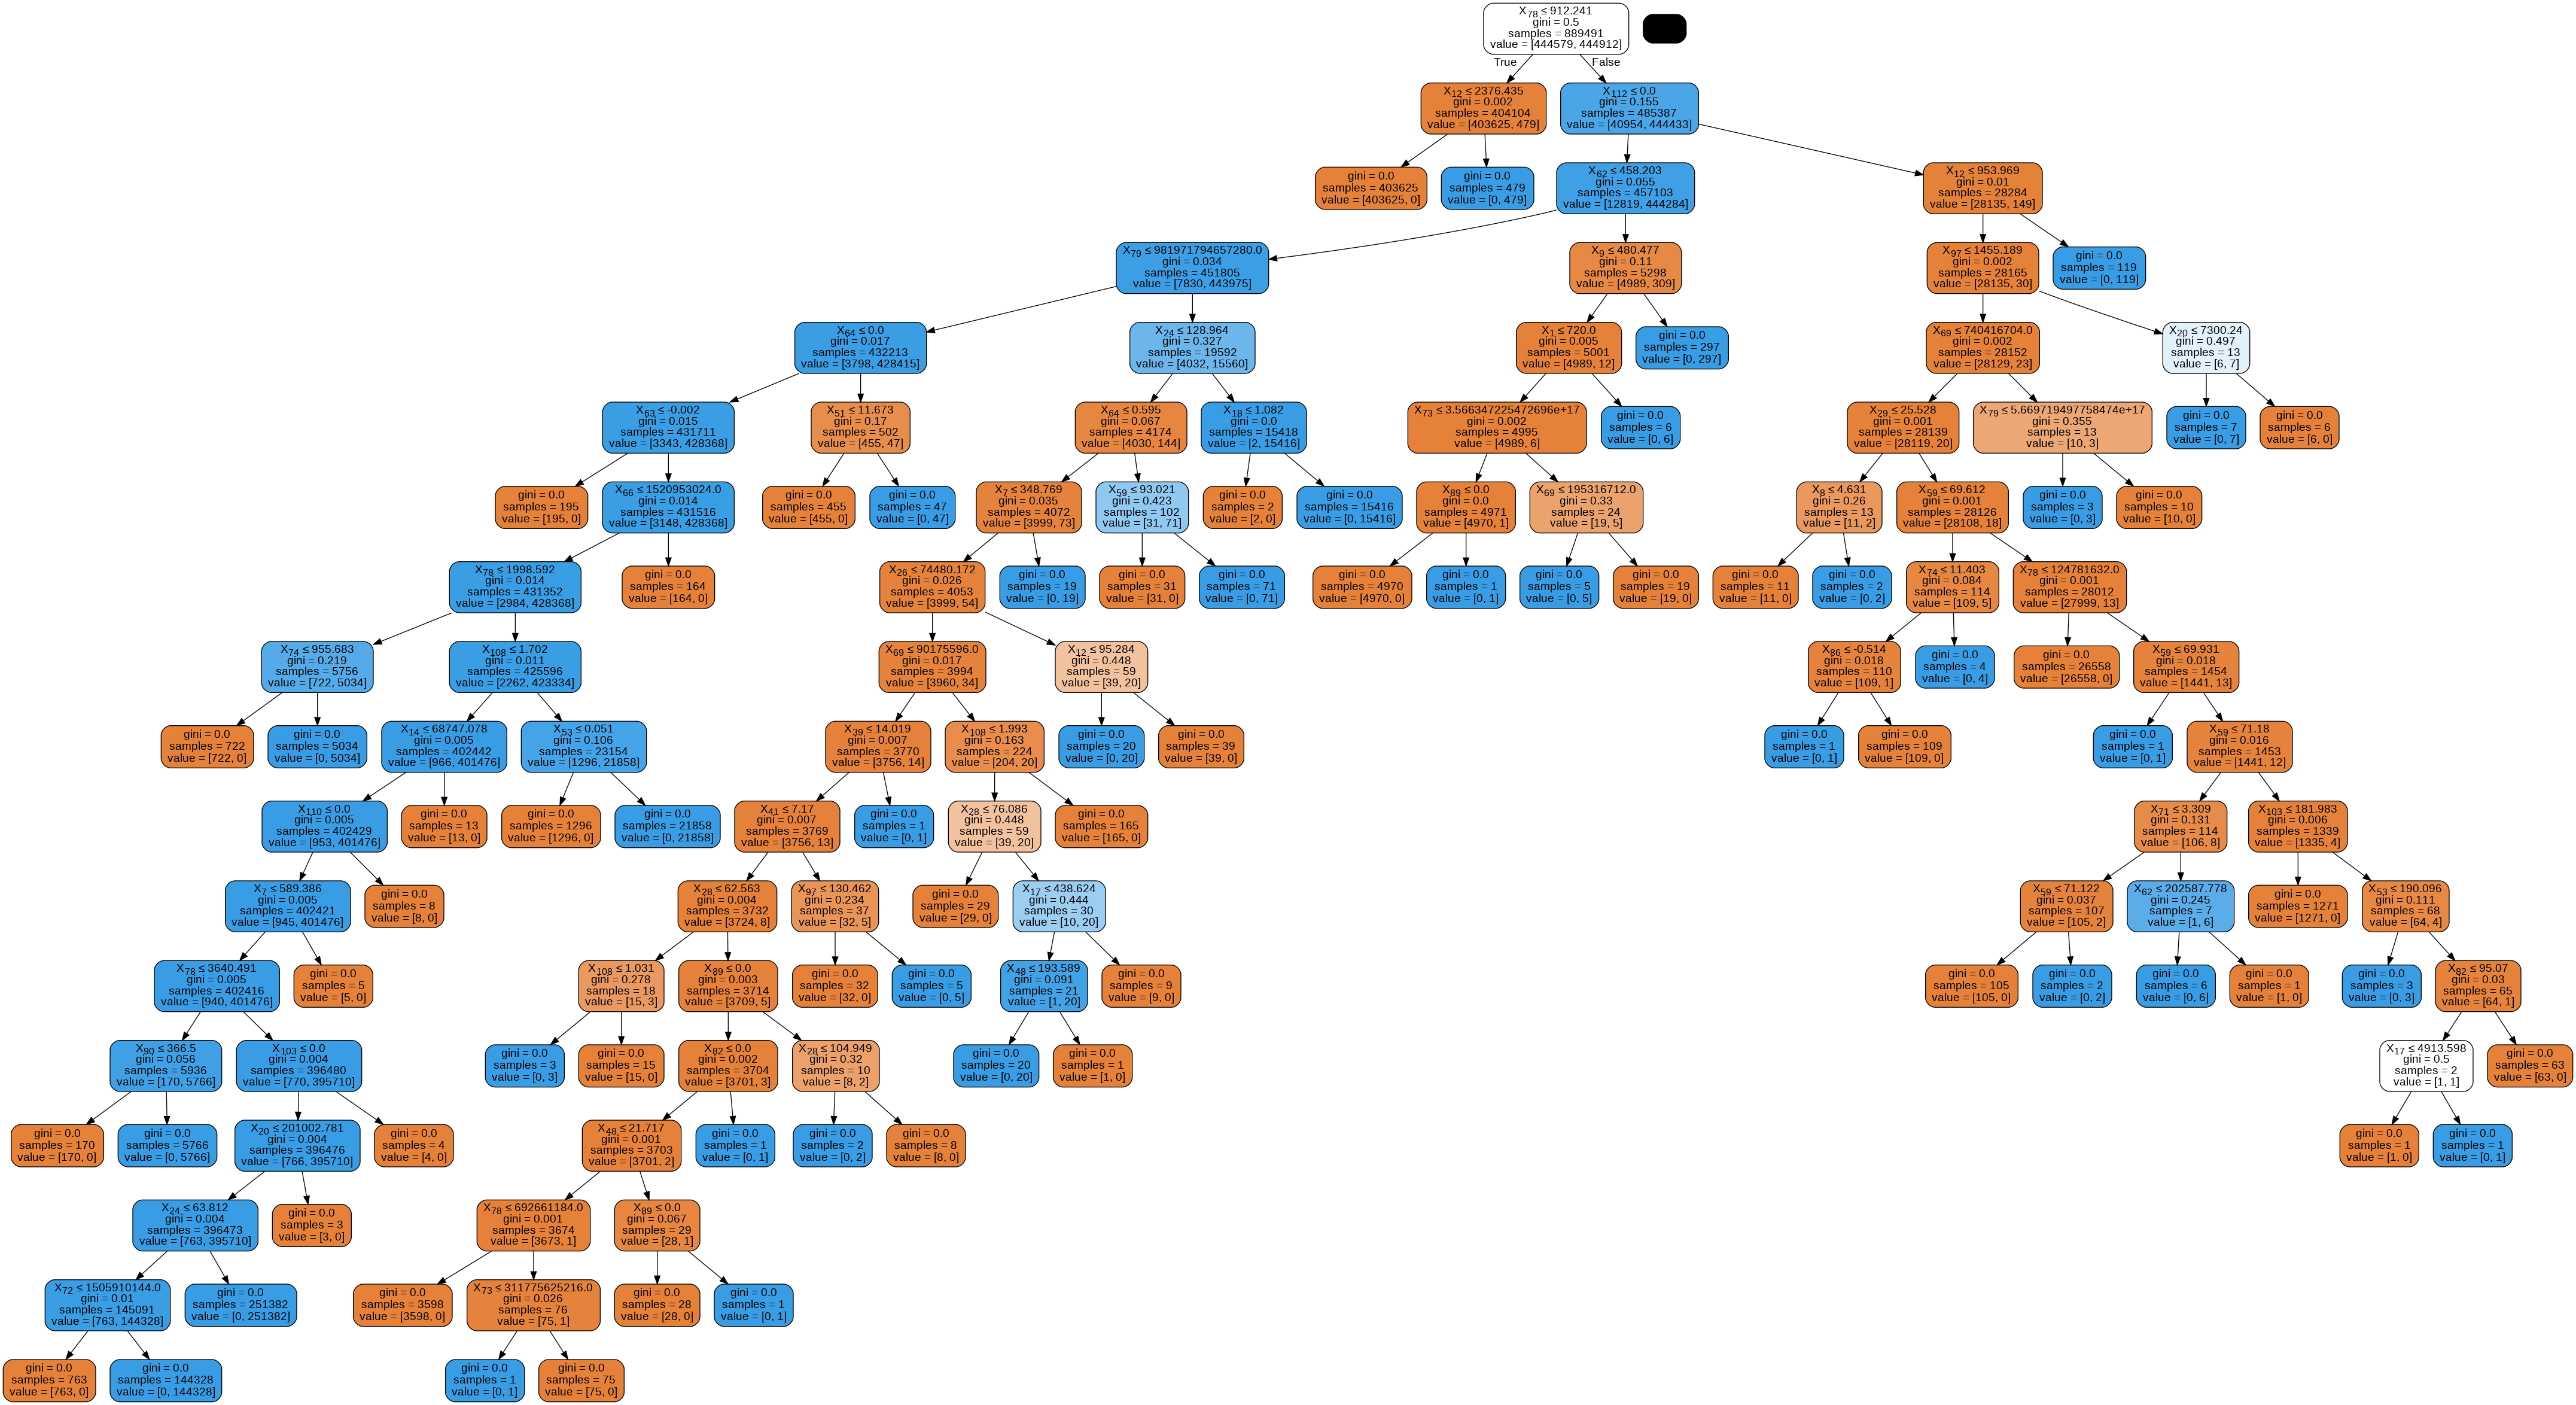

In [ ]:
from io import StringIO


from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()


export_graphviz(DT_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)

In [ ]:
cf_matrix_RF = confusion_matrix(y_test, y_pred)

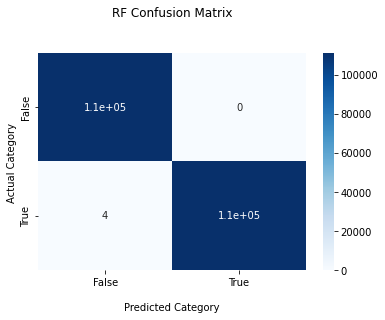

In [ ]:
# Randomforest plot
ax = sns.heatmap(cf_matrix_RF, annot=True, cmap='Blues')

ax.set_title('RF Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
RF_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_RF[0,0]
FP = cf_matrix_RF[0,1]
FN = cf_matrix_RF[1,0]
TP = cf_matrix_RF[1,1]
RF_Specificity = TN/(TN+FP)
print('Random Forest Performance Evaluation Results:')
RF_Precision = precision_score(y_test, y_pred)
RF_F1 = f1_score (y_test, y_pred)
RF_Recall = recall_score(y_test, y_pred)
print('(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)')
round(RF_Accuracy,6), round(RF_Precision,6),  round(RF_Recall,6), round(RF_F1,6), round(RF_Specificity,6)

Random Forest Performance Evaluation Results:
(RF_Accuracy, RF_Precision,  RF_Recall, RF_F1, RF_Specificity)


(0.999982, 1.0, 0.999964, 0.999982, 1.0)

In [ ]:
XGB_model = xgb.XGBClassifier()
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

In [ ]:
cf_matrix_XGB = confusion_matrix(y_test, y_pred)

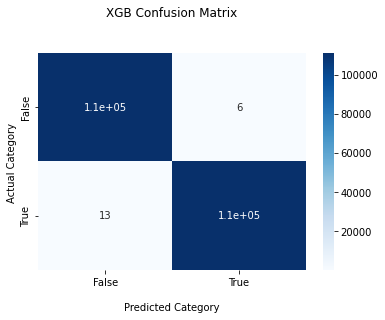

In [ ]:
# XGB plot
ax = sns.heatmap(cf_matrix_XGB, annot=True, cmap='Blues')

ax.set_title('XGB Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
XGB_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_XGB[0,0]
FP = cf_matrix_XGB[0,1]
FN = cf_matrix_XGB[1,0]
TP = cf_matrix_XGB[1,1]
XGB_Specificity = TN/(TN+FP)
print('XGB Performance Evaluation Results:')
XGB_Precision = precision_score(y_test, y_pred)
XGB_F1 = f1_score (y_test, y_pred)
XGB_Recall = recall_score(y_test, y_pred)
print('(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)')
round(XGB_Accuracy,6), round(XGB_Precision,6),  round(XGB_Recall,6), round(XGB_F1,6), round(XGB_Specificity,6)

XGB Performance Evaluation Results:
(XGB_Accuracy, XGB_Precision,  XGB_Recall, XGB_F1, XGB_Specificity)


(0.999915, 0.999946, 0.999883, 0.999914, 0.999946)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier()
Ada_model.fit(X_train, y_train)
y_pred = Ada_model.predict(X_test)

In [ ]:
cf_matrix_ADA = confusion_matrix(y_test, y_pred)

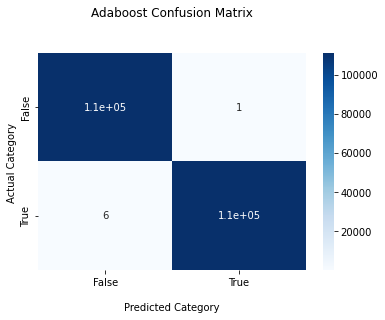

In [ ]:
# Adaboost plot
ax = sns.heatmap(cf_matrix_ADA, annot=True, cmap='Blues')

ax.set_title('Adaboost Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
ADA_Accuracy = accuracy_score(y_test, y_pred)

In [ ]:
TN = cf_matrix_ADA[0,0]
FP = cf_matrix_ADA[0,1]
FN = cf_matrix_ADA[1,0]
TP = cf_matrix_ADA[1,1]
ADA_Specificity = TN/(TN+FP)
print('Adaboost Performance Evaluation Results:')
ADA_Precision = precision_score(y_test, y_pred)
ADA_F1 = f1_score (y_test, y_pred)
ADA_Recall = recall_score(y_test, y_pred)
print('(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1, ADA_Specificity)')
round(ADA_Accuracy,6), round(ADA_Precision,6),  round(ADA_Recall,6), round(ADA_F1,6), round(ADA_Specificity,6)

Adaboost Performance Evaluation Results:
(ADA_Accuracy, ADA_Precision,  ADA_Recall, ADA_F1, ADA_Specificity)


(0.999969, 0.999991, 0.999946, 0.999968, 0.999991)